In [1]:
import sys
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from copy import deepcopy
from tqdm import tqdm
import random
from random import shuffle

In [2]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data, figsize=(16,8), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.imshow(convert_to_rgb(data.astype(int)))
    plt.title(title)
    plt.show()

def convert_to_rgb(img):
    img = deepcopy(img)
    b,g,r = cv2.split(img)  
    img = cv2.merge([r,g,b])
    return img

In [3]:
frame_dir = '../scene_data/70'
frame_bt_dir = '../scene_data/70_back_true'

In [4]:
scene_dict = {}
for file_name in os.listdir(frame_dir):
    if file_name[0] != '.':
        num, verti_pos, hori_pos, real_back_prob = file_name.replace('.jpg', '').split('_')
        scene_dict[int(num)] = {'file_name': file_name, 'num':num, 'verti_pos':int(verti_pos), 'hori_pos':int(hori_pos)}

In [5]:
scene_bt_dict = {}
for file_name in os.listdir(frame_bt_dir):
    if file_name[0] != '.':
        num, verti_pos, hori_pos, real_back_prob = file_name.replace('.npy', '').split('_')
        scene_bt_dict[int(num)] = {'file_name': file_name, 'num':num, 'verti_pos':int(verti_pos), 'hori_pos':int(hori_pos)}

In [6]:
scene_num_0 = random.choice(sorted(list(scene_dict.keys()))[:-1])
scene_num_1 = scene_num_0 + 1
file_name_0 = scene_dict[scene_num_0]['file_name']
file_name_1 = scene_dict[scene_num_1]['file_name']
file_name_bt_0 = scene_bt_dict[scene_num_0]['file_name']
file_name_bt_1 = scene_bt_dict[scene_num_1]['file_name']

In [7]:
scene_num_0, scene_num_1

(40, 41)

In [8]:
abs_pos_0 = np.array((scene_dict[scene_num_0]['verti_pos'], scene_dict[scene_num_0]['hori_pos']))
abs_pos_1 = np.array((scene_dict[scene_num_1]['verti_pos'], scene_dict[scene_num_1]['hori_pos']))

In [9]:
abs_pos_1 - abs_pos_0

array([0, 1])

In [10]:
np.sqrt(np.sum(np.power(abs_pos_1 - abs_pos_0, 2)/2))

0.7071067811865476

In [11]:
scene_dict[scene_num_1]

{'file_name': '41_457_61_49.jpg',
 'num': '41',
 'verti_pos': 457,
 'hori_pos': 61}

In [12]:
frame_0 = cv2.imread(f"{frame_dir}/{file_name_0}")
frame_1 = cv2.imread(f"{frame_dir}/{file_name_1}")
frame_bt_0 = np.load(f"{frame_bt_dir}/{file_name_bt_0}").astype(int)
frame_bt_1 = np.load(f"{frame_bt_dir}/{file_name_bt_1}").astype(int)

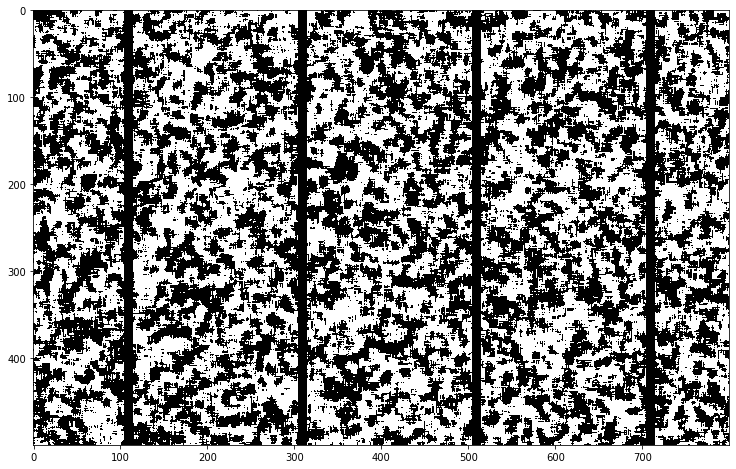

In [13]:
live_plot(frame_bt_0*255)

In [14]:
n = 1
m_num = 3

compare_dict = {}
set_shape = (n*2, n*2, 3)
for s0 in tqdm(range(n, frame_1.shape[0]), ncols=70):
    for s1 in range(n, frame_1.shape[1]):
        segment_1 = frame_1[s0-n:s0+n, s1-n:s1+n, :]
        if segment_1.shape == set_shape:
            temp_compare = {}
            for m1 in range(-m_num, m_num+1):
                for m2 in range(-m_num, m_num+1):
                    compare_0 = frame_0[max(s0-n+m1,0):max(s0+n+m1,0), max(s1-n+m2,0):max(s1+n+m2,0), :]
                    if compare_0.shape == set_shape:
                        diff_array = segment_1 - compare_0
#                         diff_array = np.array([i for i in ((segment_0 - compare_0)).reshape(-1,1) if i != 0])
                        diff = np.sum(np.power(diff_array,2))/len(diff_array)
                        temp_compare[(m1,m2)] = diff
            temp_compare = {k: v for k, v in sorted(temp_compare.items(), key=lambda item: item[1])}
            compare_dict[(s0,s1)] = np.array(list(temp_compare.keys())[0])

100%|███████████████████████████████| 499/499 [04:33<00:00,  2.21it/s]


In [15]:
compare_dict

{(1, 1): array([3, 1]),
 (1, 2): array([0, 3]),
 (1, 3): array([0, 3]),
 (1, 4): array([0, 3]),
 (1, 5): array([0, 3]),
 (1, 6): array([0, 3]),
 (1, 7): array([0, 3]),
 (1, 8): array([0, 3]),
 (1, 9): array([0, 3]),
 (1, 10): array([0, 3]),
 (1, 11): array([0, 3]),
 (1, 12): array([0, 3]),
 (1, 13): array([0, 3]),
 (1, 14): array([0, 3]),
 (1, 15): array([0, 3]),
 (1, 16): array([0, 3]),
 (1, 17): array([0, 3]),
 (1, 18): array([0, 3]),
 (1, 19): array([0, 3]),
 (1, 20): array([0, 3]),
 (1, 21): array([0, 3]),
 (1, 22): array([0, 3]),
 (1, 23): array([0, 3]),
 (1, 24): array([1, 3]),
 (1, 25): array([1, 0]),
 (1, 26): array([0, 2]),
 (1, 27): array([0, 2]),
 (1, 28): array([0, 2]),
 (1, 29): array([0, 2]),
 (1, 30): array([0, 2]),
 (1, 31): array([0, 2]),
 (1, 32): array([0, 2]),
 (1, 33): array([0, 2]),
 (1, 34): array([0, 3]),
 (1, 35): array([0, 3]),
 (1, 36): array([0, 2]),
 (1, 37): array([1, 3]),
 (1, 38): array([1, 2]),
 (1, 39): array([2, 2]),
 (1, 40): array([0, 2]),
 (1, 41):

In [16]:
compare_mean_dict = {}
for key in tqdm(compare_dict, ncols=70):
    compare_mean_dict[key] = []
    s0, s1 = key
    for c0 in range(s0-n,s0+n):
        for c1 in range(s1-n, s1+n):
            if (c0, c1) in compare_dict:
                compare_mean_dict[key].append(compare_dict[(c0, c1)])

100%|█████████████████████| 398701/398701 [00:01<00:00, 203323.38it/s]


In [17]:
compare_mean_dict

{(1, 1): [array([3, 1])],
 (1, 2): [array([3, 1]), array([0, 3])],
 (1, 3): [array([0, 3]), array([0, 3])],
 (1, 4): [array([0, 3]), array([0, 3])],
 (1, 5): [array([0, 3]), array([0, 3])],
 (1, 6): [array([0, 3]), array([0, 3])],
 (1, 7): [array([0, 3]), array([0, 3])],
 (1, 8): [array([0, 3]), array([0, 3])],
 (1, 9): [array([0, 3]), array([0, 3])],
 (1, 10): [array([0, 3]), array([0, 3])],
 (1, 11): [array([0, 3]), array([0, 3])],
 (1, 12): [array([0, 3]), array([0, 3])],
 (1, 13): [array([0, 3]), array([0, 3])],
 (1, 14): [array([0, 3]), array([0, 3])],
 (1, 15): [array([0, 3]), array([0, 3])],
 (1, 16): [array([0, 3]), array([0, 3])],
 (1, 17): [array([0, 3]), array([0, 3])],
 (1, 18): [array([0, 3]), array([0, 3])],
 (1, 19): [array([0, 3]), array([0, 3])],
 (1, 20): [array([0, 3]), array([0, 3])],
 (1, 21): [array([0, 3]), array([0, 3])],
 (1, 22): [array([0, 3]), array([0, 3])],
 (1, 23): [array([0, 3]), array([0, 3])],
 (1, 24): [array([0, 3]), array([1, 3])],
 (1, 25): [array

In [18]:
for key in compare_mean_dict:
    compare_mean_dict[key] = np.mean(compare_mean_dict[key], axis=0)
    compare_mean_dict[key] = np.sqrt(np.sum(np.power(compare_mean_dict[key], 2)/2))

In [19]:
back_compare_mean_dict = {k: v for k, v in sorted(compare_mean_dict.items(), key=lambda item: item[1]) if v <= np.sqrt(np.sum(np.power(abs_pos_1 - abs_pos_0, 2)/2))}
hedge_compare_mean_dict = {k: v for k, v in sorted(compare_mean_dict.items(), key=lambda item: item[1]) if v > np.sqrt(np.sum(np.power(abs_pos_1 - abs_pos_0, 2)/2))}

In [20]:
back_accurate_list = []
for i, j in back_compare_mean_dict:
    if sum(frame_bt_1[i][j])==3:
        back_accurate_list.append(1)
    else:
        back_accurate_list.append(0)
print(sum(back_accurate_list)/len(back_accurate_list))

0.7517266382670171


In [21]:
hedge_accurate_list = []
for i, j in hedge_compare_mean_dict:
    if sum(frame_bt_1[i][j]) == 0:
        hedge_accurate_list.append(1)
    else:
        hedge_accurate_list.append(0)
print(sum(hedge_accurate_list)/len(hedge_accurate_list))

0.5499132550882586


In [22]:
len(back_accurate_list), len(hedge_accurate_list)

(55165, 343536)